##CO2 Timeseries
Valentina Strokopytova

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages

import datetime

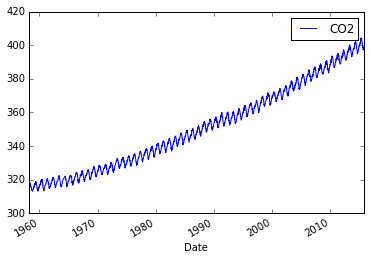

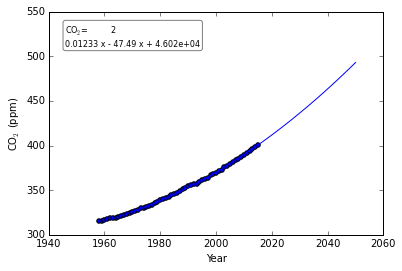

In [23]:
url='http://scrippsco2.ucsd.edu/sites/default/files/data/in_situ_co2/weekly_mlo.csv'
mlo=pd.read_csv(url,skiprows=21,names=['Date','CO2'],index_col='Date',parse_dates=True)
mlo.plot()

#get the x and y data from the larger data set for plotting.
x=mlo.CO2.resample('A',how=np.mean).index.year
y=mlo.CO2.resample('A',how=np.mean)

#fit the data using poly1d and use linspace.
fit_order=2   #this is the order of the line.
x_fit=np.linspace(1970,2050)  
a=np.polyfit(x,y,fit_order)  
polynominal=np.poly1d(a)
y_fit=polynominal(x_fit)

#plot the data, the fit, label the axes and add the equation using a text box.
fig,ax=plt.subplots()
ax.plot(x_fit,y_fit)
ax.scatter(x,y)
ax.set_ylabel('CO$_2$ (ppm)')
ax.set_xlabel('Year')

props=dict(boxstyle='round',facecolor='white',alpha=0.5)
textstr='CO$_2$={}'.format(np.poly1d(a))
ax.text(0.05,0.95,textstr,transform=ax.transAxes,fontsize=8,verticalalignment='top',bbox=props)

In [4]:
mlo['Year']=mlo.index.year
print mlo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2937 entries, 1958-03-29 to 2015-10-31
Data columns (total 2 columns):
CO2     2937 non-null float64
Year    2937 non-null int32
dtypes: float64(1), int32(1)
memory usage: 57.4 KB
None


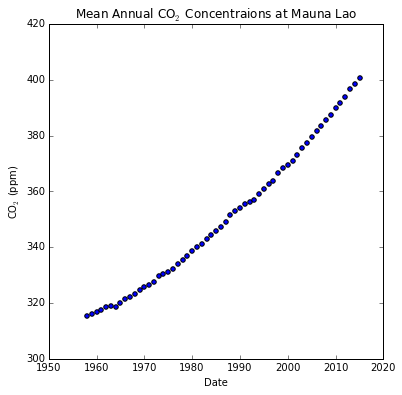

In [5]:
fig,ax=plt.subplots()
fig.set_size_inches(6,6)
x=mlo.CO2.resample('A',how=np.mean).index.year
y=mlo.CO2.resample('A',how=np.mean)
ax.scatter(x,y)
ax.set_ylabel('CO$_2$ (ppm)')
ax.set_xlabel('Date')
ax.set_title('Mean Annual CO$_2$ Concentraions at Mauna Lao')

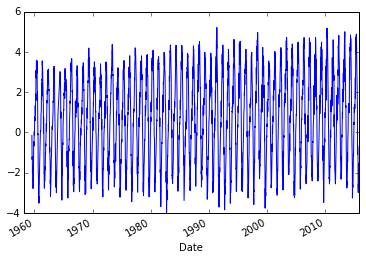

In [24]:
#The difference between every sampling point and the mean value for the year to see the seasonal differences
url='http://scrippsco2.ucsd.edu/sites/default/files/data/in_situ_co2/weekly_mlo.csv'
mlo=pd.read_csv(url,skiprows=21,names=['Date','CO2'],index_col='Date',parse_dates=True)

mlo['CO2_res']=mlo.CO2-pd.rolling_mean(mlo,52)
ax.set_ylabel('Residuals')
ax.set_ylim([-4,6])
mlo['CO2_res'].plot()
ax.set_title('Yearly Residuals')


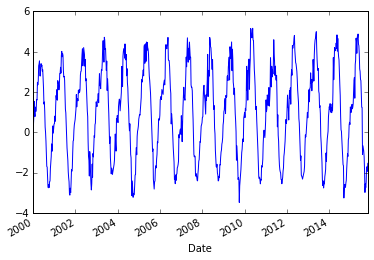

In [25]:
#residuals between years 2000-2015
mlo['2000':'2015'].CO2_res.plot()
mlocp=mlo.CO2_res-pd.rolling_mean(mlo,52)
ax.set_ylim([-4,6])
ax.set_ylabel('Residuals')
ax.set_title('Yearly Residuals')

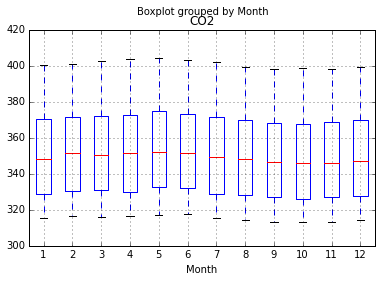

In [12]:
#monthly CO2
mlo['Month']=mlo.index.month
mlo.boxplot(column='CO2',by='Month')

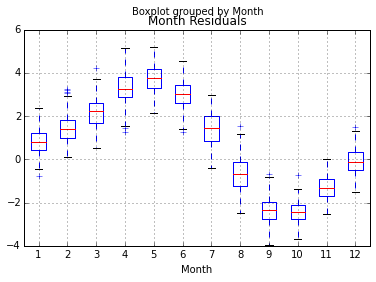

In [20]:
#monthly mean residuals
mlo['Month']=mlo.index.month
mlo['Month Residuals']=mlo.CO2-pd.rolling_mean(mlo.CO2,52)
mlo.boxplot(column='Month Residuals',by='Month')

##CO2 Box Model (Bonus)

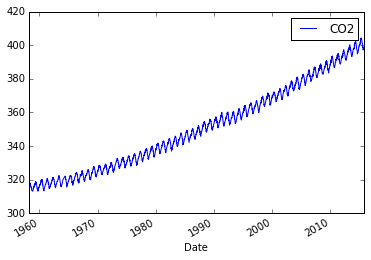

In [21]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages

import datetime

url='http://scrippsco2.ucsd.edu/sites/default/files/data/in_situ_co2/weekly_mlo.csv'
mlo=pd.read_csv(url,skiprows=21,names=['Date','CO2'],index_col='Date',parse_dates=True)
mlo.plot()

In [22]:
mlo.index


DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-17', '1958-05-24',
               '1958-07-05', '1958-07-12', 
               ...
               '2015-08-29', '2015-09-05', '2015-09-12', '2015-09-19',
               '2015-09-26', '2015-10-03', '2015-10-10', '2015-10-17',
               '2015-10-24', '2015-10-31'],
              dtype='datetime64[ns]', name=u'Date', length=2937, freq=None, tz=None)

In [23]:
mlo['elapsed'] = (mlo.index.to_series() - mlo.index.to_series()[0])

In [24]:
mlo.head()

,CO2,elapsed
Date,,
1958-03-29,316.19,0 days
1958-04-05,317.31,7 days
1958-04-12,317.69,14 days
1958-04-19,317.58,21 days
1958-04-26,316.48,28 days


In [25]:
mlo['elapsed'] = (mlo.index.to_series() - mlo.index.to_series()[0])/datetime.timedelta(days=365)

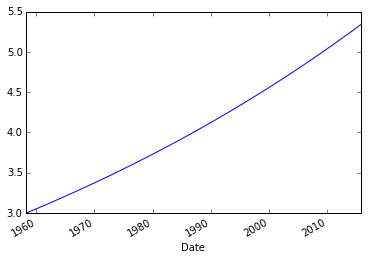

In [26]:
So=3.
R=.01
mlo['S']=So*np.exp(R*mlo.elapsed)
mlo.S.plot()